In [36]:
from astropy.io import fits
from astropy.cosmology import FlatLambdaCDM
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.coordinates import SkyCoord
from matplotlib.gridspec import GridSpec
file='lab1-data.fits'
fits.info(file, ext=0)
image_data = fits.getdata(file, ext=0)

Filename: lab1-data.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     23   1000R x 3C   [D, D, D]   


In [39]:
l=np.size(image_data)
d=np.zeros((l,3))
redshifts=np.zeros((l,1))
ra=np.zeros((l,1))
dec=np.zeros((l,1))

n=['Name'+" "+'RA'+" "+'DEC']
for i in range(l):
    d[i,:]=np.array(image_data[i])
    dec[i]=d[i,1]
    n.append("A"+str(i)+" "+str(d[i,0])+" "+str(d[i,1]))
    redshifts[i]=d[i,2] 

In [41]:
with open("lab1-data.txt", "w") as file:
    for i in range(l):
        file.write(n[i]+"\n")

In [42]:
magi=np.zeros((l,1))
i=0
results=open("result.csv", "r")
for line in results:
    line=line.split(",")
    if i==0:
        index=line.index('modelMag_i')
    else:
        magi[i]=float(line[index])
    i+=1

In [43]:
cosmo=FlatLambdaCDM(H0=70, Om0=0.7)
distance=[]
for i in redshifts:
    lum_dist=cosmo.luminosity_distance(i)
    ld=lum_dist.value
    distance.append(5*np.log10((ld*1000000)/10))

In [57]:
absolute=[]
for i in range(l):
    absolute.append(-(distance[i]-magi[i]))
absolute=np.array(absolute[1:995])

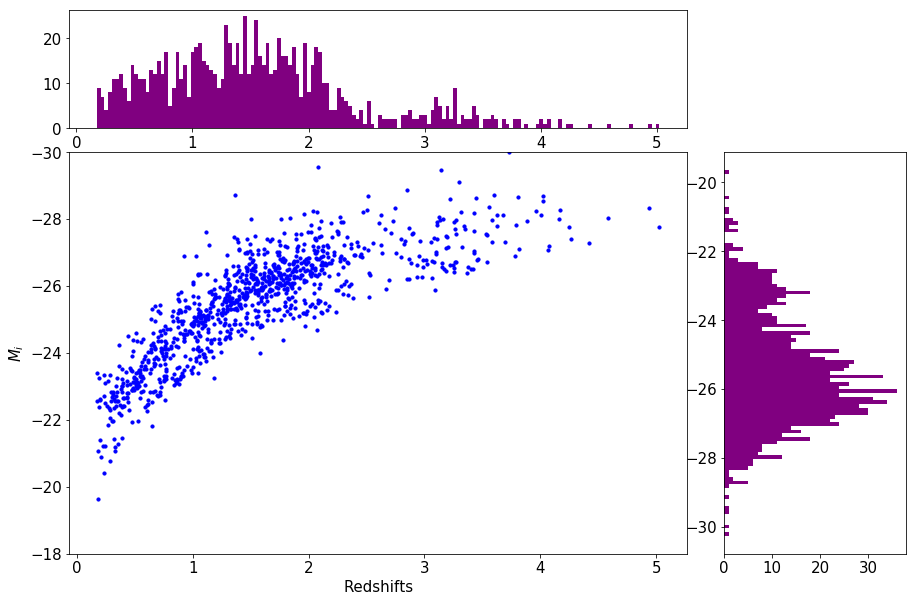

In [81]:
fig=plt.figure()
gs=GridSpec(4,4)

ax_joint=fig.add_subplot(gs[1:4,0:3])
ax_marg_x=fig.add_subplot(gs[0,0:3])
ax_marg_y=fig.add_subplot(gs[1:4,3])

#ax_joint.gca().invert_yaxis()
ax_joint.set_ylim([-18,-30])
ax_joint.scatter(redshifts[1:995],absolute,s=10, color="blue")
ax_marg_x.hist(redshifts[1:995], bins=150, color="purple")
ax_marg_y.hist(absolute,orientation='horizontal', bins=100, color="purple")
plt.rcParams["figure.figsize"]=[15,10]
ax_joint.set_xlabel('Redshifts', fontsize=15)
ax_joint.set_ylabel('$M_i$', fontsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

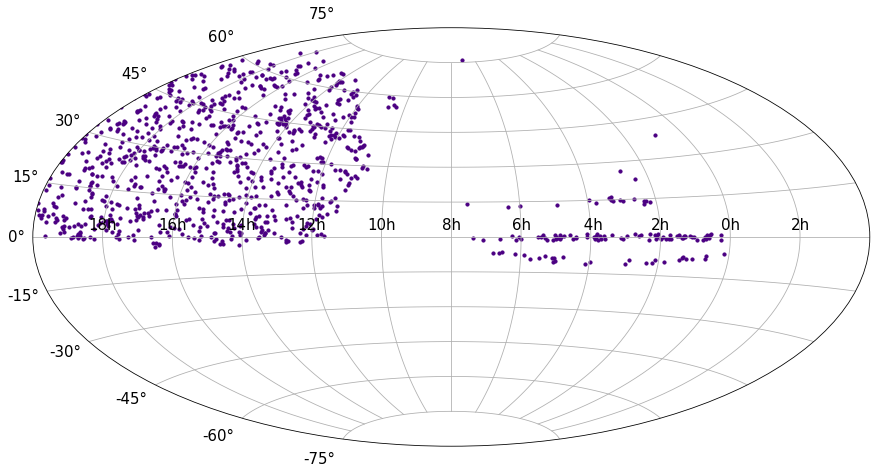

In [89]:
ra=d[:,0]* u.degree
dec=d[:,1]* u.degree
c = SkyCoord(ra=ra, dec=dec, frame='icrs')
ra_rad = c.ra.wrap_at(60* u.deg).radian
ra_rad1 = c.ra.radian
dec_rad=c.dec.radian

fig = plt.figure()

ax = fig.add_subplot(111, projection= "aitoff")
ax.grid(True)

xlab=['18h','16h','14h','12h','10h', '8h', '6h',' 4h', '2h','0h','2h']
ax.set_xticklabels(xlab)
ax.scatter(np.add(ra_rad[1:995],60*np.pi/180),dec_rad[1:995], s=10, color="indigo")
fig.show()